In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 

In [2]:
dataset = pd.read_csv('bike_buyers.csv')

In [3]:
dataset

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [5]:
dataset.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [6]:
bike_clean = dataset.copy()

In [7]:
#change ID type from int to string
bike_clean.ID = bike_clean.ID.astype(str)

In [8]:
#replace missing cars values with median
bike_clean.Cars = bike_clean.Cars.fillna(bike_clean.Cars.median())

In [9]:
#change Cars type from float to int
bike_clean.Cars = bike_clean.Cars.astype(int)

In [10]:
#replace missing Income values with median
bike_clean.Income = bike_clean.Income.fillna(bike_clean.Income.median())

In [11]:
#change Income type from float to int
bike_clean.Income = bike_clean.Income.astype(int)

In [12]:
#replace missing Children values with median
bike_clean.Children = bike_clean.Children.fillna(bike_clean.Children.median())

In [13]:
#change Children type from float to int
bike_clean.Children = bike_clean.Children.astype(int)

In [14]:
#replace missing Home Owner values with the mode
bike_clean['Home Owner'] = bike_clean['Home Owner'].fillna(bike_clean['Home Owner'].mode()[0])

In [15]:
#replace missing Gender values with the mode
bike_clean.Gender = bike_clean.Gender.fillna(bike_clean.Gender.mode()[0])

In [16]:
#change Gender type to catagorical
bike_clean.Gender = bike_clean.Gender.astype('category')

In [17]:
#replace missing Marital Status values with the mode
bike_clean['Marital Status'] = bike_clean['Marital Status'].fillna(bike_clean['Marital Status'].mode()[0])

In [18]:
#replace missing Age values with median
bike_clean.Age = bike_clean.Age.fillna(bike_clean.Age.median())

In [19]:
#change age type from float to int
bike_clean.Age = bike_clean.Age.astype(int)

In [20]:
#test
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                1000 non-null   object  
 1   Marital Status    1000 non-null   object  
 2   Gender            1000 non-null   category
 3   Income            1000 non-null   int32   
 4   Children          1000 non-null   int32   
 5   Education         1000 non-null   object  
 6   Occupation        1000 non-null   object  
 7   Home Owner        1000 non-null   object  
 8   Cars              1000 non-null   int32   
 9   Commute Distance  1000 non-null   object  
 10  Region            1000 non-null   object  
 11  Age               1000 non-null   int32   
 12  Purchased Bike    1000 non-null   object  
dtypes: category(1), int32(4), object(8)
memory usage: 79.3+ KB


In [21]:
bike_clean.to_csv('bike_clean.csv')

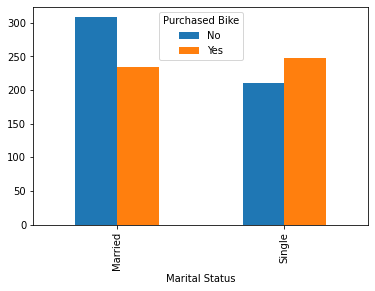

In [22]:
bike_clean.groupby(['Marital Status','Purchased Bike']).size().unstack().plot(kind='bar')

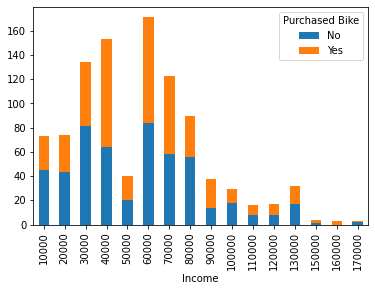

In [23]:
bike_clean.groupby(['Income','Purchased Bike']).size().unstack().plot(kind='bar',stacked=True)

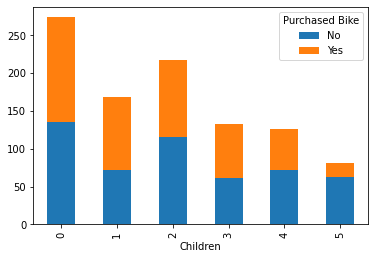

In [24]:
bike_clean.groupby(['Children','Purchased Bike']).size().unstack().plot(kind='bar',stacked=True)

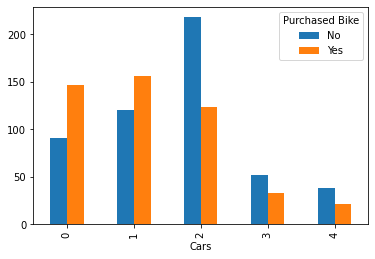

In [25]:
bike_clean.groupby(['Cars','Purchased Bike']).size().unstack().plot(kind='bar')

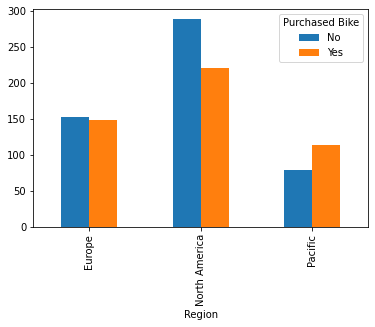

In [26]:
bike_clean.groupby(['Region','Purchased Bike']).size().unstack().plot(kind='bar')

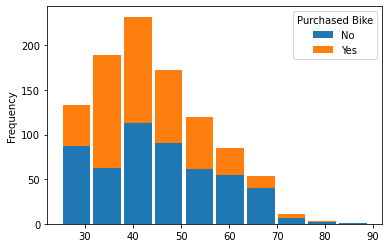

In [27]:
bike_clean.pivot(columns='Purchased Bike').Age.plot(kind = 'hist', stacked=True,rwidth=0.9)

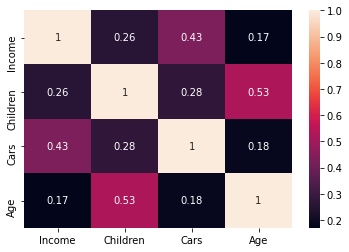

In [28]:
corrMatrix = bike_clean.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [29]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()
bike_clean['Marital Status'] = label_encoder.fit_transform(bike_clean['Marital Status'])
bike_clean['Gender'] = label_encoder.fit_transform(bike_clean['Gender'])
bike_clean['Education'] = label_encoder.fit_transform(bike_clean['Education'])
bike_clean['Occupation'] = label_encoder.fit_transform(bike_clean['Occupation'])
bike_clean['Home Owner'] = label_encoder.fit_transform(bike_clean['Home Owner'])
bike_clean['Commute Distance'] = label_encoder.fit_transform(bike_clean['Commute Distance'])
bike_clean['Region'] = label_encoder.fit_transform(bike_clean['Region'])
bike_clean['Purchased Bike'] = label_encoder.fit_transform(bike_clean['Purchased Bike'])
bike_clean.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000,1,0,4,1,0,0,0,42,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,0
2,14177,0,1,80000,5,3,3,0,2,3,0,60,0
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1


In [30]:
#Categorize Continuous Data
bike_clean['Age'] = pd.cut(x = bike_clean['Age'], bins = [0,30,40,50,60,100,150], labels = [0, 1, 2, 3, 4, 5])
bike_clean['Age'] = bike_clean['Age'].astype('int64')
bike_clean['Income'] = pd.cut(x = bike_clean['Income'], bins = [0, 30000, 50000, 75000, 100000, 150000, 200000], labels = [1, 2, 3, 4, 5, 6])
bike_clean['Income'] = bike_clean['Income'].astype('int64')

In [31]:
bike_clean.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,2,1,0,4,1,0,0,0,2,0
1,24107,0,1,1,3,3,0,1,1,0,0,2,0
2,14177,0,1,4,5,3,3,0,2,3,0,3,0
3,24381,1,1,3,0,0,3,1,1,4,2,2,1
4,25597,1,1,1,0,0,0,0,0,0,0,1,1


In [32]:
print(bike_clean.shape)

(1000, 13)


In [33]:
#split data into train set / test set
X = bike_clean
y = bike_clean['Purchased Bike']
del X['Purchased Bike']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=999)

In [35]:
#usin Random Forest algorithm for classification
model = RandomForestClassifier()
model.fit(X_train,y_train)
print("Accuracy:" ,model.score(X_test,y_test))

Accuracy: 0.7133333333333334


In [36]:
y_pred=model.predict(X_test)
cm_matrix = confusion_matrix(y_test,y_pred)
print(cm_matrix)

[[102  43]
 [ 43 112]]


In [37]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7133333333333334


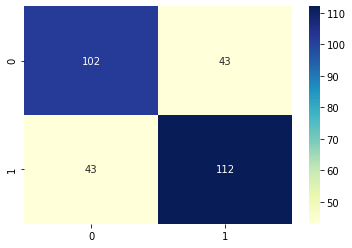

In [38]:
#visualizing classification results
sns.heatmap(cm_matrix, annot=True, fmt='d',cmap="YlGnBu")